In [ ]:
import sys
import pathlib
import numpy as np

source_dir = (pathlib.Path.cwd()/'..')
sys.path.append(str(source_dir))
import utils
from read_config import Config
import examine_model

In [2]:
config_path = 'configs/model_1000_15.yaml'
config = Config(config_path, root_dir = '../..')

In [63]:
training_set = utils.get_dataset_from_config(config)
training_set = np.array([row[0].numpy() for row in training_set])
latent_means = examine_model.get_saved_latent_space_as_numpy(config)[0]

query_raw = training_set[0]
query_latent = latent_means[0]

protein_length = len(query_raw)//21
size = len(training_set)

In [64]:
single_mutant_library = np.zeros((len(query_raw), len(query_raw)), dtype = int)
for i in range(protein_length):
    for j in range(21):
        base = query_raw
        base[21*i:21*i+21] = 0
        base[21*i+j] = 1

In [52]:
sample_size = size

# Query Sequence
# xor double counts all differences
# hamming_distances = np.sum(np.logical_xor(query_raw, training_set), axis=1)/protein_length/2
# latent_distances = np.zeros(len(latent_means))
# for i, latent in enumerate(latent_means):
#     distance = np.linalg.norm(latent-query_latent)
#     latent_distances[i] = distance

# Random pairs
# hamming_distances = np.zeros(size)
# latent_distances = np.zeros(size)
# for i in range(sample_size):
#     i1 = np.random.randint(0, size)
#     i2 = np.random.randint(0, size)
#     ham = np.sum(np.logical_xor(training_set[i1], training_set[i2]))/protein_length/2
#     lat = np.linalg.norm(latent_means[i1]-latent_means[i2])
    
#     hamming_distances[i] = ham
#     latent_distances[i] = lat

[Text(0, 0.5, 'latent distance'),
 Text(0.5, 0, 'hamming distance'),
 Text(0.5, 1.0, 'raw protein vs 15d latent encoding (random pairs)')]

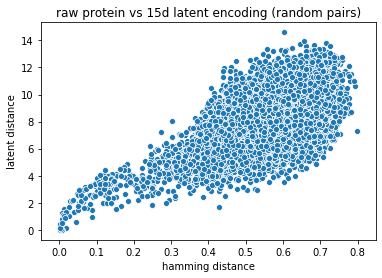

In [53]:
import seaborn as sns

sns.scatterplot(hamming_distances, latent_distances).set(
    xlabel='hamming distance', ylabel='latent distance', title='raw protein vs 15d latent encoding (random pairs)')